In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./Labeling_App/Labels.csv")

In [ ]:
ax = df["label"].value_counts().sort_index().plot.bar(xlabel="Label", ylabel="Bilder",title="Häufigkeit der Label")

In [ ]:
df["label"].value_counts().sort_index()

In [ ]:
(200 - df["label"].value_counts().sort_index()).values

In [ ]:
df

In [ ]:
df = pd.read_csv("./Labeling_App/Labels.csv")

In [ ]:
df_all = pd.read_csv("./Image_proc/data_with_features_with_colour.csv")

In [ ]:
df_file = df_all.file

In [ ]:
df = df_all.drop("file", axis=1)

In [ ]:
df[df["label"]==5][["Contours"]].hist()

In [ ]:
df[df["label"]==8][["Contours"]].hist()

# VdKI Projekt Präsentation

In [154]:
import sys
import platform

sys_path = '/Users/jonathanhaller/Documents/Studium/Master/Verfahren_der_KI/KI_Projekt/repo/KI_Projekt/Neural_net'
if platform.system() == "Windows":
    sys_path = sys_path.replace("/", "\\")
sys.path.insert(0, sys_path)

from Model import Model
from main import load_ritter_sport_xy, get_mean_error
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import numpy as np
import tensorflow as tf
import tensorflow.keras

## Verwendete Daten
Bilder mit unterschiedlicher Anzahl an Mini-Rittersporttafeln. Zwischen 0 und 14 Tafeln auf einem Bild

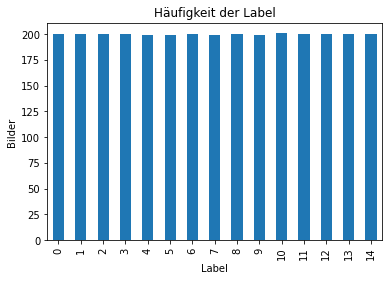

In [155]:
label_path = "./Labeling_App/Labels.csv"
if platform.system() == "Windows":
    label_path = label_path.replace("/", "\\")

df = pd.read_csv(label_path)
ax = df["label"].value_counts().sort_index().plot.bar(xlabel="Label", ylabel="Bilder",title="Häufigkeit der Label")

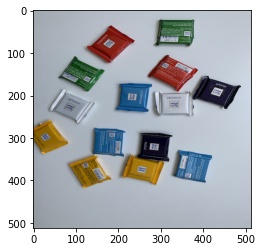

In [125]:
IMAGE_NO = 2000

images_path = "./data/"
if platform.system() == "Windows":
    images_path = images_path.replace("/", "\\")

file_list = sorted(os.listdir(images_path))
image_list = [images_path+file for file in file_list if ".png" in file]
image = cv2.imread(image_list[IMAGE_NO])

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [140]:
df.sort_values(by="file", axis=0, inplace=True)
df

,file,label
135,IMG_3608.png,9
148,IMG_3609.png,9
365,IMG_3610.png,9
380,IMG_3611.png,9
346,IMG_3612.png,9
...,...,...
2992,IMG_7344.png,0
2993,IMG_7345.png,0
2994,IMG_7346.png,0
2995,IMG_7347.png,0


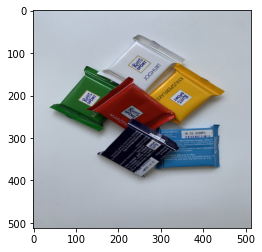

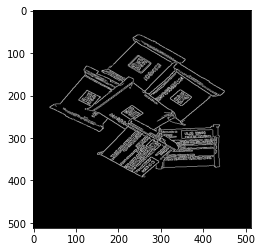

Anzahl der erkannten Linien: 211


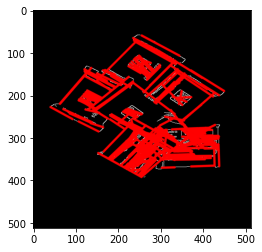

Anzahl der erkannten Konturen: 5
Fläche der erkannten Konturen: 21473


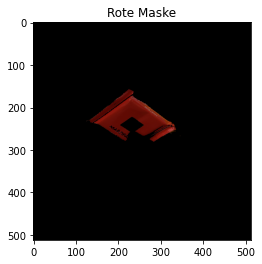

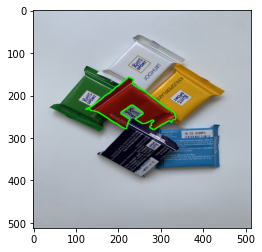

[211, 5, 21473]


In [112]:
%run image_proc_pres.ipynb

## Neuronales Netz mit Tensorflow/Keras
### Laden der Daten für Tensorflow Netz

In [151]:
data_path = "./Image_proc/data_with_features_with_colour.csv"
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")

X_train, X_test, y_train, y_test = load_ritter_sport_xy(data_path)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)
train_mean = np.mean(X_train)
train_std = np.std(X_train)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std
X_val = (X_val - train_mean) / train_std

### Laden des Modells und Vorhersagen erstellen

In [152]:
model_path = "./models/TF_NN.h5"
if platform.system() == "Windows":
    model_path = model_path.replace("/", "\\")

nn_model = tf.keras.models.load_model(model_path)

In [153]:
predictions_nn = nn_model.predict(X_test)

24/24 [==============================] - 0s 2ms/step


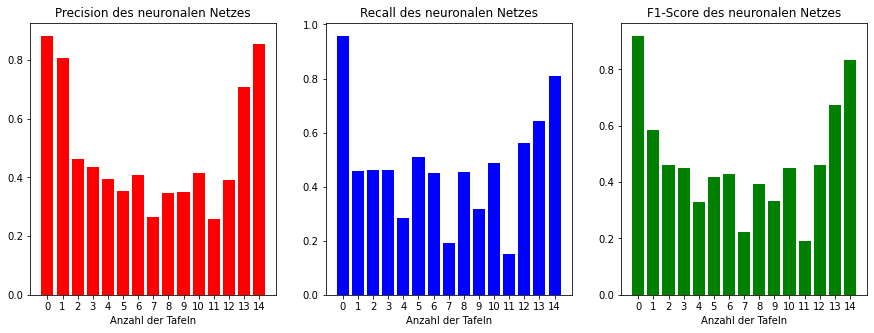

In [150]:
predictions_nn = np.argmax(predictions_nn, axis=1)
y_true = np.argmax(y_test, axis=1)

net_precisions = precision_score(y_true, net_predictions, average=None)
net_recalls = recall_score(y_true, net_predictions, average=None)
net_f1s = f1_score(y_true, net_predictions, average=None)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.setp(ax, xticks=np.unique(np.argmax(y_test, axis=1)), xlabel="Anzahl der Tafeln")

#create subplots
ax[0].bar(np.unique(np.argmax(y_test, axis=1)), my_net_precisions, color='red')
ax[0].set_title("Precision des neuronalen Netzes")
ax[1].bar(np.unique(np.argmax(y_test, axis=1)), my_net_recalls, color='blue')
ax[1].set_title("Recall des neuronalen Netzes")
ax[2].bar(np.unique(np.argmax(y_test, axis=1)), my_net_f1s, color='green')
ax[2].set_title("F1-Score des neuronalen Netzes")
plt.show()

## Selbst implementiertes neuronales Netz
### Laden der Daten für selbst implementiertes neuronales Netz

In [156]:
data_path = "./Image_proc/data_with_features_without_white.csv"
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")

X_train, X_test, y_train, y_test = load_ritter_sport_xy(data_path)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=0)
train_mean = np.mean(X_train)
train_std = np.std(X_train)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std
X_val = (X_val - train_mean) / train_std

In [92]:
model = Model()
model.add_layer(X_train.shape[1])
model.add_layer(128)
model.add_layer(64)
model.add_layer(32)
model.add_layer(y_train.shape[1])

In [93]:
model.train(X_train, y_train, epochs=1000, eta=0.01, mini_batch_size=16, val_x=X_val, val_y=y_val)

Epoche 1 von 1000
Update-Count: 120

Train-Loss: 3.702059282479555
Train-Acc: 0.17077003666841278
Val-Loss: 4.900749534643055
Val-Acc: 0.05917159763313609

Epoche 2 von 1000
Update-Count: 120

Train-Loss: 3.3619964243091673
Train-Acc: 0.20220010476689365
Val-Loss: 3.508106291593399
Val-Acc: 0.15680473372781065

Epoche 3 von 1000
Update-Count: 120

Train-Loss: 3.212598071961231
Train-Acc: 0.22053431115767416
Val-Loss: 3.3242412114449005
Val-Acc: 0.21005917159763313

Epoche 4 von 1000
Update-Count: 120

Train-Loss: 3.1130449135191633
Train-Acc: 0.23677317967522263
Val-Loss: 3.2108921127486396
Val-Acc: 0.24260355029585798

Epoche 5 von 1000
Update-Count: 120

Train-Loss: 3.0397371645443676
Train-Acc: 0.25510738606600314
Val-Loss: 3.1293238169374016
Val-Acc: 0.2514792899408284

Epoche 6 von 1000
Update-Count: 120

Train-Loss: 2.9811030437884725
Train-Acc: 0.26977475117862754
Val-Loss: 3.0639916424723737
Val-Acc: 0.2603550295857988

Epoche 7 von 1000
Update-Count: 120

Train-Loss: 2.9336862

Update-Count: 120

Train-Loss: 2.5830700459253797
Train-Acc: 0.34520691461498165
Val-Loss: 2.5977139261284083
Val-Acc: 0.33727810650887574

Epoche 56 von 1000
Update-Count: 120

Train-Loss: 2.5778777072796375
Train-Acc: 0.3462545835515977
Val-Loss: 2.58976299726146
Val-Acc: 0.33136094674556216

Epoche 57 von 1000
Update-Count: 120

Train-Loss: 2.573988844713289
Train-Acc: 0.3467784180199057
Val-Loss: 2.5850314777491876
Val-Acc: 0.33727810650887574

Epoche 58 von 1000
Update-Count: 120

Train-Loss: 2.5706990801948413
Train-Acc: 0.3488737558931378
Val-Loss: 2.5808987017254355
Val-Acc: 0.3343195266272189

Epoche 59 von 1000
Update-Count: 120

Train-Loss: 2.5682859369501276
Train-Acc: 0.3493975903614458
Val-Loss: 2.5760261970490883
Val-Acc: 0.34023668639053256

Epoche 60 von 1000
Update-Count: 120

Train-Loss: 2.565469794140498
Train-Acc: 0.3467784180199057
Val-Loss: 2.571565921037864
Val-Acc: 0.34023668639053256

Epoche 61 von 1000
Update-Count: 120

Train-Loss: 2.5623365362646546
Train-A

Update-Count: 120

Train-Loss: 2.48828996646603
Train-Acc: 0.37297014143530643
Val-Loss: 2.4831866233989737
Val-Acc: 0.3698224852071006

Epoche 109 von 1000
Update-Count: 120

Train-Loss: 2.487302681036748
Train-Acc: 0.3713986380303824
Val-Loss: 2.4818146920095554
Val-Acc: 0.3698224852071006

Epoche 110 von 1000
Update-Count: 120

Train-Loss: 2.486278748116761
Train-Acc: 0.37035096909376636
Val-Loss: 2.4802969988275634
Val-Acc: 0.3668639053254438

Epoche 111 von 1000
Update-Count: 120

Train-Loss: 2.484206995224316
Train-Acc: 0.36930330015715035
Val-Loss: 2.479426610570888
Val-Acc: 0.3698224852071006

Epoche 112 von 1000
Update-Count: 120

Train-Loss: 2.482952866110556
Train-Acc: 0.3719224724986904
Val-Loss: 2.477155144808488
Val-Acc: 0.3727810650887574

Epoche 113 von 1000
Update-Count: 120

Train-Loss: 2.481829267878573
Train-Acc: 0.37035096909376636
Val-Loss: 2.4766230846308463
Val-Acc: 0.3727810650887574

Epoche 114 von 1000
Update-Count: 120

Train-Loss: 2.4809175822258123
Train-A

Update-Count: 120

Train-Loss: 2.4049997663899054
Train-Acc: 0.38239916186485073
Val-Loss: 2.406533734066568
Val-Acc: 0.3994082840236686

Epoche 163 von 1000
Update-Count: 120

Train-Loss: 2.4032806401596347
Train-Acc: 0.38344683080146674
Val-Loss: 2.4047365973431956
Val-Acc: 0.39644970414201186

Epoche 164 von 1000
Update-Count: 120

Train-Loss: 2.4009378879416503
Train-Acc: 0.38711367207962283
Val-Loss: 2.402240681980138
Val-Acc: 0.39644970414201186

Epoche 165 von 1000
Update-Count: 120

Train-Loss: 2.397946866481987
Train-Acc: 0.38344683080146674
Val-Loss: 2.3943630502486166
Val-Acc: 0.3994082840236686

Epoche 166 von 1000
Update-Count: 120

Train-Loss: 2.3964763764463397
Train-Acc: 0.38501833420639076
Val-Loss: 2.396134941452878
Val-Acc: 0.39644970414201186

Epoche 167 von 1000
Update-Count: 120

Train-Loss: 2.393828384783928
Train-Acc: 0.38711367207962283
Val-Loss: 2.402100467761988
Val-Acc: 0.39349112426035504

Epoche 168 von 1000
Update-Count: 120

Train-Loss: 2.391533325881439

Update-Count: 120

Train-Loss: 2.279148137032835
Train-Acc: 0.4064955474070194
Val-Loss: 2.388834158004833
Val-Acc: 0.39349112426035504

Epoche 215 von 1000
Update-Count: 120

Train-Loss: 2.2788822283207897
Train-Acc: 0.40597171293871137
Val-Loss: 2.3803050469246556
Val-Acc: 0.39644970414201186

Epoche 216 von 1000
Update-Count: 120

Train-Loss: 2.2700353696034696
Train-Acc: 0.4064955474070194
Val-Loss: 2.3475146594852156
Val-Acc: 0.40532544378698226

Epoche 217 von 1000
Update-Count: 120

Train-Loss: 2.2687362600062015
Train-Acc: 0.40806705081194344
Val-Loss: 2.3828185327472604
Val-Acc: 0.3994082840236686

Epoche 218 von 1000
Update-Count: 120

Train-Loss: 2.265172544692858
Train-Acc: 0.41173389209009953
Val-Loss: 2.3757341129799645
Val-Acc: 0.39644970414201186

Epoche 219 von 1000
Update-Count: 120

Train-Loss: 2.2635074315887405
Train-Acc: 0.4112100576217915
Val-Loss: 2.336631780176181
Val-Acc: 0.40236686390532544

Epoche 220 von 1000
Update-Count: 120

Train-Loss: 2.261049147088058

Update-Count: 120

Train-Loss: 2.1975840669283047
Train-Acc: 0.4326872708224201
Val-Loss: 2.1763308909571704
Val-Acc: 0.4319526627218935

Epoche 267 von 1000
Update-Count: 120

Train-Loss: 2.191222096690174
Train-Acc: 0.43006809848088007
Val-Loss: 2.1766838988697446
Val-Acc: 0.4349112426035503

Epoche 268 von 1000
Update-Count: 120

Train-Loss: 2.195357772428316
Train-Acc: 0.429020429544264
Val-Loss: 2.2456825231277917
Val-Acc: 0.41420118343195267

Epoche 269 von 1000
Update-Count: 120

Train-Loss: 2.1842574788859683
Train-Acc: 0.43059193294918807
Val-Loss: 2.140713123659364
Val-Acc: 0.4408284023668639

Epoche 270 von 1000
Update-Count: 120

Train-Loss: 2.184395601316551
Train-Acc: 0.43006809848088007
Val-Loss: 2.1516435809511747
Val-Acc: 0.4260355029585799

Epoche 271 von 1000
Update-Count: 120

Train-Loss: 2.1891261612375335
Train-Acc: 0.42692509167103193
Val-Loss: 2.148199737971336
Val-Acc: 0.4230769230769231

Epoche 272 von 1000
Update-Count: 120

Train-Loss: 2.182162821628041
Trai

Update-Count: 120

Train-Loss: 2.110508064104125
Train-Acc: 0.44525929806181247
Val-Loss: 2.0399315232457544
Val-Acc: 0.47928994082840237

Epoche 321 von 1000
Update-Count: 120

Train-Loss: 2.1096580809223013
Train-Acc: 0.4536406495547407
Val-Loss: 2.037169999136842
Val-Acc: 0.47928994082840237

Epoche 322 von 1000
Update-Count: 120

Train-Loss: 2.1095348346183527
Train-Acc: 0.44787847040335255
Val-Loss: 2.0675782388425987
Val-Acc: 0.4556213017751479

Epoche 323 von 1000
Update-Count: 120

Train-Loss: 2.1119733743836506
Train-Acc: 0.4426401257202724
Val-Loss: 2.066044655770262
Val-Acc: 0.4556213017751479

Epoche 324 von 1000
Update-Count: 120

Train-Loss: 2.112682584755034
Train-Acc: 0.44735463593504454
Val-Loss: 2.0647568744759197
Val-Acc: 0.46153846153846156

Epoche 325 von 1000
Update-Count: 120

Train-Loss: 2.1098937041474852
Train-Acc: 0.4400209533787323
Val-Loss: 2.068140070715867
Val-Acc: 0.4556213017751479

Epoche 326 von 1000
Update-Count: 120

Train-Loss: 2.1116783567729733
T

Update-Count: 120

Train-Loss: 2.0436194771663043
Train-Acc: 0.4578313253012048
Val-Loss: 1.9924847487745072
Val-Acc: 0.47633136094674555

Epoche 373 von 1000
Update-Count: 120

Train-Loss: 2.0590902511077864
Train-Acc: 0.4541644840230487
Val-Loss: 1.9962493092400229
Val-Acc: 0.47928994082840237

Epoche 374 von 1000
Update-Count: 120

Train-Loss: 2.0413782607753737
Train-Acc: 0.4546883184913567
Val-Loss: 1.9869083075884582
Val-Acc: 0.47928994082840237

Epoche 375 von 1000
Update-Count: 120

Train-Loss: 2.0495907873321904
Train-Acc: 0.46306966998428495
Val-Loss: 1.986006299604603
Val-Acc: 0.47633136094674555

Epoche 376 von 1000
Update-Count: 120

Train-Loss: 2.0439188730735727
Train-Acc: 0.4557359874279728
Val-Loss: 1.9957908178385466
Val-Acc: 0.4822485207100592

Epoche 377 von 1000
Update-Count: 120

Train-Loss: 2.0455877613282363
Train-Acc: 0.4573074908328968
Val-Loss: 1.9962316480598525
Val-Acc: 0.4822485207100592

Epoche 378 von 1000
Update-Count: 120

Train-Loss: 2.045525020581536

Update-Count: 120

Train-Loss: 2.002412055930933
Train-Acc: 0.4677841801990571
Val-Loss: 1.9615431948567912
Val-Acc: 0.4881656804733728

Epoche 426 von 1000
Update-Count: 120

Train-Loss: 1.9984503815763308
Train-Acc: 0.46621267679413303
Val-Loss: 1.9654258340240915
Val-Acc: 0.4911242603550296

Epoche 427 von 1000
Update-Count: 120

Train-Loss: 2.0148719541172517
Train-Acc: 0.4704033525405972
Val-Loss: 1.9615106681669494
Val-Acc: 0.4940828402366864

Epoche 428 von 1000
Update-Count: 120

Train-Loss: 2.011661189860642
Train-Acc: 0.46935568360398117
Val-Loss: 1.9604191829030642
Val-Acc: 0.4881656804733728

Epoche 429 von 1000
Update-Count: 120

Train-Loss: 2.010461610753842
Train-Acc: 0.465165007857517
Val-Loss: 1.9614810567631755
Val-Acc: 0.4881656804733728

Epoche 430 von 1000
Update-Count: 120

Train-Loss: 1.9967682034595524
Train-Acc: 0.463593504452593
Val-Loss: 1.9690071171567722
Val-Acc: 0.47928994082840237

Epoche 431 von 1000
Update-Count: 120

Train-Loss: 2.01875656550375
Train-

Update-Count: 120

Train-Loss: 1.9501412654290131
Train-Acc: 0.4777370350969094
Val-Loss: 1.9374444896588934
Val-Acc: 0.4940828402366864

Epoche 480 von 1000
Update-Count: 120

Train-Loss: 1.96336788681023
Train-Acc: 0.4782608695652174
Val-Loss: 1.9398479086252365
Val-Acc: 0.4911242603550296

Epoche 481 von 1000
Update-Count: 120

Train-Loss: 1.9635114153195594
Train-Acc: 0.47564169722367733
Val-Loss: 1.9432950637404434
Val-Acc: 0.5088757396449705

Epoche 482 von 1000
Update-Count: 120

Train-Loss: 1.9669723870808251
Train-Acc: 0.46987951807228917
Val-Loss: 1.936693355843894
Val-Acc: 0.4940828402366864

Epoche 483 von 1000
Update-Count: 120

Train-Loss: 1.9760936546680097
Train-Acc: 0.45887899423782086
Val-Loss: 1.9360455919912263
Val-Acc: 0.5029585798816568

Epoche 484 von 1000
Update-Count: 120

Train-Loss: 1.938763086032267
Train-Acc: 0.4777370350969094
Val-Loss: 1.9311357367743445
Val-Acc: 0.4970414201183432

Epoche 485 von 1000
Update-Count: 120

Train-Loss: 1.9452849853905991
Tra

Update-Count: 120

Train-Loss: 1.9008271972174933
Train-Acc: 0.4892613933996857
Val-Loss: 1.921893737729686
Val-Acc: 0.5029585798816568

Epoche 534 von 1000
Update-Count: 120

Train-Loss: 1.9177745863117495
Train-Acc: 0.4892613933996857
Val-Loss: 1.9185775939298526
Val-Acc: 0.5088757396449705

Epoche 535 von 1000
Update-Count: 120

Train-Loss: 1.8963410862539911
Train-Acc: 0.4824515453116815
Val-Loss: 1.9204964610942146
Val-Acc: 0.4970414201183432

Epoche 536 von 1000
Update-Count: 120

Train-Loss: 1.9192967263176661
Train-Acc: 0.48349921424829756
Val-Loss: 1.9249349652030376
Val-Acc: 0.5059171597633136

Epoche 537 von 1000
Update-Count: 120

Train-Loss: 1.9124946052146037
Train-Acc: 0.48454688318491357
Val-Loss: 1.920922367801141
Val-Acc: 0.5088757396449705

Epoche 538 von 1000
Update-Count: 120

Train-Loss: 1.927780822267913
Train-Acc: 0.4798323729701414
Val-Loss: 1.9202640812923286
Val-Acc: 0.5059171597633136

Epoche 539 von 1000
Update-Count: 120

Train-Loss: 1.8958298585849278
Tra

Update-Count: 120

Train-Loss: 1.8834611549776576
Train-Acc: 0.49083289680460973
Val-Loss: 1.9203598685475678
Val-Acc: 0.5088757396449705

Epoche 588 von 1000
Update-Count: 120

Train-Loss: 1.8316565697165201
Train-Acc: 0.5096909376636982
Val-Loss: 1.9138624010179432
Val-Acc: 0.5118343195266272

Epoche 589 von 1000
Update-Count: 120

Train-Loss: 1.8797606657766714
Train-Acc: 0.4960712414876899
Val-Loss: 1.9166859785437629
Val-Acc: 0.5177514792899408

Epoche 590 von 1000
Update-Count: 120

Train-Loss: 1.8592647043754331
Train-Acc: 0.49764274489261395
Val-Loss: 1.9195314257658742
Val-Acc: 0.5177514792899408

Epoche 591 von 1000
Update-Count: 120

Train-Loss: 1.8534653247098667
Train-Acc: 0.502357255107386
Val-Loss: 1.905154966766747
Val-Acc: 0.5177514792899408

Epoche 592 von 1000
Update-Count: 120

Train-Loss: 1.881294091391786
Train-Acc: 0.49135673127291773
Val-Loss: 1.9130717377224025
Val-Acc: 0.5207100591715976

Epoche 593 von 1000
Update-Count: 120

Train-Loss: 1.8920144127467524
Tr

Update-Count: 120

Train-Loss: 1.8330630152547949
Train-Acc: 0.5055002619172342
Val-Loss: 1.910026933823159
Val-Acc: 0.5118343195266272

Epoche 642 von 1000
Update-Count: 120

Train-Loss: 1.8664913809111738
Train-Acc: 0.4897852278679937
Val-Loss: 1.9001256668226087
Val-Acc: 0.514792899408284

Epoche 643 von 1000
Update-Count: 120

Train-Loss: 1.8293313419351607
Train-Acc: 0.49973808276584597
Val-Loss: 1.9000799796865246
Val-Acc: 0.5118343195266272

Epoche 644 von 1000
Update-Count: 120

Train-Loss: 1.8500164208781178
Train-Acc: 0.4971189104243059
Val-Loss: 1.9037551310337015
Val-Acc: 0.5118343195266272

Epoche 645 von 1000
Update-Count: 120

Train-Loss: 1.861472493428791
Train-Acc: 0.4965950759559979
Val-Loss: 1.8997003031990083
Val-Acc: 0.514792899408284

Epoche 646 von 1000
Update-Count: 120

Train-Loss: 1.8316579025670785
Train-Acc: 0.5055002619172342
Val-Loss: 1.9026810507703813
Val-Acc: 0.5118343195266272

Epoche 647 von 1000
Update-Count: 120

Train-Loss: 1.825582503569275
Train-

Update-Count: 120

Train-Loss: 1.7887159770700358
Train-Acc: 0.5170246202200105
Val-Loss: 1.9020899168183534
Val-Acc: 0.5088757396449705

Epoche 696 von 1000
Update-Count: 120

Train-Loss: 1.8154075105326517
Train-Acc: 0.5107386066003143
Val-Loss: 1.8950900586553516
Val-Acc: 0.5118343195266272

Epoche 697 von 1000
Update-Count: 120

Train-Loss: 1.807524844578429
Train-Acc: 0.5154531168150864
Val-Loss: 1.9011231003917244
Val-Acc: 0.5088757396449705

Epoche 698 von 1000
Update-Count: 120

Train-Loss: 1.7918986460822781
Train-Acc: 0.5133577789418544
Val-Loss: 1.9126873089040213
Val-Acc: 0.514792899408284

Epoche 699 von 1000
Update-Count: 120

Train-Loss: 1.792430672071322
Train-Acc: 0.5165007857517024
Val-Loss: 1.9061817133771208
Val-Acc: 0.5118343195266272

Epoche 700 von 1000
Update-Count: 120

Train-Loss: 1.7848849335445702
Train-Acc: 0.5248821372446307
Val-Loss: 1.8976592830646164
Val-Acc: 0.514792899408284

Epoche 701 von 1000
Update-Count: 120

Train-Loss: 1.7956073834185216
Train-

Update-Count: 120

Train-Loss: 1.781822356789215
Train-Acc: 0.5159769512833945
Val-Loss: 1.9123070341660915
Val-Acc: 0.514792899408284

Epoche 750 von 1000
Update-Count: 120

Train-Loss: 1.7717783694901732
Train-Acc: 0.5165007857517024
Val-Loss: 1.9028134454365448
Val-Acc: 0.5177514792899408

Epoche 751 von 1000
Update-Count: 120

Train-Loss: 1.7590444155394291
Train-Acc: 0.5185961236249346
Val-Loss: 1.9012135894321833
Val-Acc: 0.5236686390532544

Epoche 752 von 1000
Update-Count: 120

Train-Loss: 1.7751130431059299
Train-Acc: 0.5185961236249346
Val-Loss: 1.9006204418737562
Val-Acc: 0.5236686390532544

Epoche 753 von 1000
Update-Count: 120

Train-Loss: 1.8048079964019879
Train-Acc: 0.5154531168150864
Val-Loss: 1.8995812348511227
Val-Acc: 0.5177514792899408

Epoche 754 von 1000
Update-Count: 120

Train-Loss: 1.7742464957938904
Train-Acc: 0.5144054478784704
Val-Loss: 1.8972394593135602
Val-Acc: 0.5207100591715976

Epoche 755 von 1000
Update-Count: 120

Train-Loss: 1.7583158187717682
Trai

Update-Count: 120

Train-Loss: 1.7530376593926804
Train-Acc: 0.5212152959664746
Val-Loss: 1.902270427106293
Val-Acc: 0.5295857988165681

Epoche 804 von 1000
Update-Count: 120

Train-Loss: 1.7505021778428853
Train-Acc: 0.5191199580932425
Val-Loss: 1.8934005704178456
Val-Acc: 0.5236686390532544

Epoche 805 von 1000
Update-Count: 120

Train-Loss: 1.7870892815739465
Train-Acc: 0.5144054478784704
Val-Loss: 1.8968419574243636
Val-Acc: 0.514792899408284

Epoche 806 von 1000
Update-Count: 120

Train-Loss: 1.7399576852047878
Train-Acc: 0.5191199580932425
Val-Loss: 1.896935767910153
Val-Acc: 0.5266272189349113

Epoche 807 von 1000
Update-Count: 120

Train-Loss: 1.7459187216627639
Train-Acc: 0.5269774751178627
Val-Loss: 1.9020758195687724
Val-Acc: 0.5207100591715976

Epoche 808 von 1000
Update-Count: 120

Train-Loss: 1.746883138040416
Train-Acc: 0.5264536406495547
Val-Loss: 1.897011333370043
Val-Acc: 0.5207100591715976

Epoche 809 von 1000
Update-Count: 120

Train-Loss: 1.7288065521504075
Train-A

Update-Count: 120

Train-Loss: 1.7368810735999296
Train-Acc: 0.5280251440544788
Val-Loss: 1.9075308079403346
Val-Acc: 0.5325443786982249

Epoche 858 von 1000
Update-Count: 120

Train-Loss: 1.7112739990124646
Train-Acc: 0.5306443163960188
Val-Loss: 1.9370825127139633
Val-Acc: 0.5355029585798816

Epoche 859 von 1000
Update-Count: 120

Train-Loss: 1.7236147322691069
Train-Acc: 0.5301204819277109
Val-Loss: 1.9121977333312372
Val-Acc: 0.5266272189349113

Epoche 860 von 1000
Update-Count: 120

Train-Loss: 1.7097006941951598
Train-Acc: 0.5280251440544788
Val-Loss: 1.9099338886269013
Val-Acc: 0.5295857988165681

Epoche 861 von 1000
Update-Count: 120

Train-Loss: 1.733498955743144
Train-Acc: 0.5301204819277109
Val-Loss: 1.9119089186416949
Val-Acc: 0.5295857988165681

Epoche 862 von 1000
Update-Count: 120

Train-Loss: 1.7362845277587875
Train-Acc: 0.5254059717129387
Val-Loss: 1.905094893996318
Val-Acc: 0.5207100591715976

Epoche 863 von 1000
Update-Count: 120

Train-Loss: 1.708124103463714
Train

Update-Count: 120

Train-Loss: 1.687344577620534
Train-Acc: 0.5437401781037192
Val-Loss: 1.8986521717707165
Val-Acc: 0.5177514792899408

Epoche 912 von 1000
Update-Count: 120

Train-Loss: 1.692387334449109
Train-Acc: 0.5390256678889471
Val-Loss: 1.9019841949821756
Val-Acc: 0.5266272189349113

Epoche 913 von 1000
Update-Count: 120

Train-Loss: 1.6933650725020222
Train-Acc: 0.5385018334206391
Val-Loss: 1.9093854973042308
Val-Acc: 0.5325443786982249

Epoche 914 von 1000
Update-Count: 120

Train-Loss: 1.7079648521090067
Train-Acc: 0.536406495547407
Val-Loss: 1.9015566505284311
Val-Acc: 0.5236686390532544

Epoche 915 von 1000
Update-Count: 120

Train-Loss: 1.7238359886880363
Train-Acc: 0.532739654269251
Val-Loss: 1.9062904553087439
Val-Acc: 0.5177514792899408

Epoche 916 von 1000
Update-Count: 120

Train-Loss: 1.703466532668638
Train-Acc: 0.5437401781037192
Val-Loss: 1.900077890491346
Val-Acc: 0.5088757396449705

Epoche 917 von 1000
Update-Count: 120

Train-Loss: 1.6941268322873324
Train-Ac

Update-Count: 120

Train-Loss: 1.6612272944445443
Train-Acc: 0.5463593504452593
Val-Loss: 1.906190970336082
Val-Acc: 0.5177514792899408

Epoche 965 von 1000
Update-Count: 120

Train-Loss: 1.6750233283268485
Train-Acc: 0.5463593504452593
Val-Loss: 1.9099886789636413
Val-Acc: 0.5177514792899408

Epoche 966 von 1000
Update-Count: 120

Train-Loss: 1.6659973201493408
Train-Acc: 0.5447878470403352
Val-Loss: 1.906423349784049
Val-Acc: 0.5177514792899408

Epoche 967 von 1000
Update-Count: 120

Train-Loss: 1.672203245861752
Train-Acc: 0.5390256678889471
Val-Loss: 1.9078439714931177
Val-Acc: 0.5207100591715976

Epoche 968 von 1000
Update-Count: 120

Train-Loss: 1.6893350500331004
Train-Acc: 0.5437401781037192
Val-Loss: 1.9027277936419271
Val-Acc: 0.5177514792899408

Epoche 969 von 1000
Update-Count: 120

Train-Loss: 1.6732121840035792
Train-Acc: 0.5453116815086433
Val-Loss: 1.9034914258294096
Val-Acc: 0.5118343195266272

Epoche 970 von 1000
Update-Count: 120

Train-Loss: 1.684062221924091
Train-

Accuracy = 0.48133333333333334



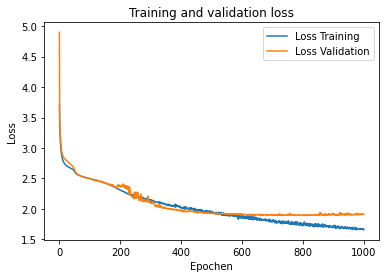

In [100]:
model.predict(X_test, y_test)
plt.plot(model.loss, label="Loss Training")
plt.plot(model.val_loss, label="Loss Validation")
plt.xlabel("Epochen")
plt.ylabel("Loss")
plt.title('Training and validation loss')
plt.legend()
plt.savefig("My_neural_net_loss.svg")
plt.show()

In [98]:
net_predictions = np.argmax(model.predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

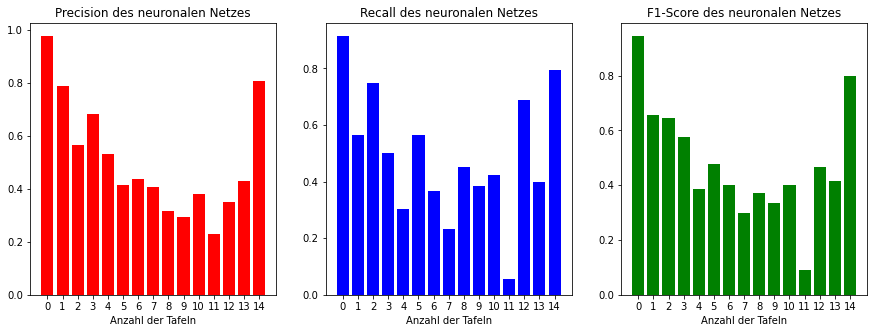

In [99]:
my_net_precisions = precision_score(y_true, net_predictions, average=None)
my_net_recalls = recall_score(y_true, net_predictions, average=None)
my_net_f1s = f1_score(y_true, net_predictions, average=None)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.setp(ax, xticks=np.unique(np.argmax(y_test, axis=1)), xlabel="Anzahl der Tafeln")

#create subplots
ax[0].bar(np.unique(np.argmax(y_test, axis=1)), my_net_precisions, color='red')
ax[0].set_title("Precision des neuronalen Netzes")
ax[1].bar(np.unique(np.argmax(y_test, axis=1)), my_net_recalls, color='blue')
ax[1].set_title("Recall des neuronalen Netzes")
ax[2].bar(np.unique(np.argmax(y_test, axis=1)), my_net_f1s, color='green')
ax[2].set_title("F1-Score des neuronalen Netzes")
plt.show()

Mean-Error: 1.646437994722955


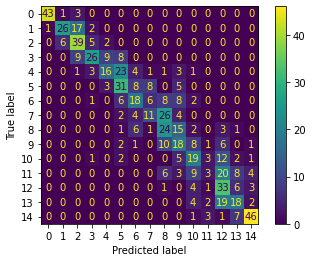

In [102]:
mean_diff = get_mean_error(model.predictions, y_test)
print(f"Mean-Error: {mean_diff}")
ConfusionMatrixDisplay.from_predictions(y_true, predictions)
plt.show()

## Selbst implementierter Decision Tree

In [157]:
sys_path = '/Users/jonathanhaller/Documents/Studium/Master/Verfahren_der_KI/KI_Projekt/repo/KI_Projekt/Decision_Tree'
if platform.system() == "Windows":
    data_path = data_path.replace("/", "\\")

sys.path.insert(0, '/Users/jonathanhaller/Documents/Studium/Master/Verfahren_der_KI/KI_Projekt/repo/KI_Projekt/Decision_Tree')

In [158]:
from My_Decision_Tree import MyDecisionTreeClassifier

## Richtige Features noch auswählen

In [162]:
my_tree = MyDecisionTreeClassifier()
my_tree.fit(X_train, np.argmax(y_train, axis=1), max_depth=None)
my_tree.predict(X_test, np.argmax(y_test, axis=1))

Accuracy: 0.6586666666666666


### Metriken des eigenen Decision Trees

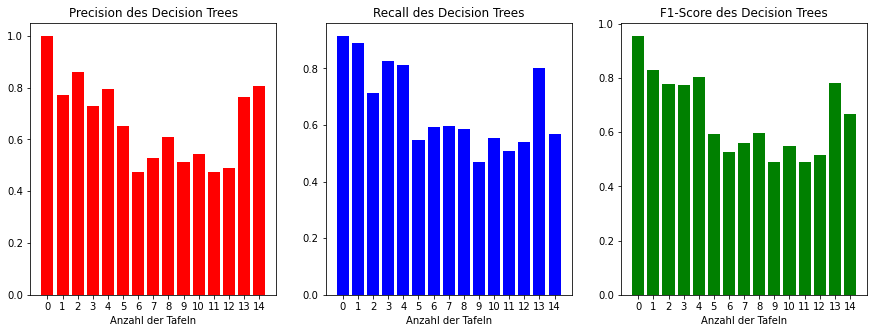

In [160]:
my_tree_precisions = precision_score(y_true, my_tree.predictions, average=None)
my_tree_recalls = recall_score(y_true, my_tree.predictions, average=None)
my_tree_f1s = f1_score(y_true, my_tree.predictions, average=None)

fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.setp(ax, xticks=np.unique(np.argmax(y_test, axis=1)), xlabel="Anzahl der Tafeln")

#create subplots
ax[0].bar(np.unique(np.argmax(y_test, axis=1)), my_tree_precisions, color='red')
ax[0].set_title("Precision des Decision Trees")
ax[1].bar(np.unique(np.argmax(y_test, axis=1)), my_tree_recalls, color='blue')
ax[1].set_title("Recall des Decision Trees")
ax[2].bar(np.unique(np.argmax(y_test, axis=1)), my_tree_f1s, color='green')
ax[2].set_title("F1-Score des Decision Trees")
plt.show()

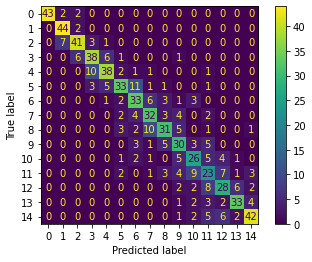

In [73]:
ConfusionMatrixDisplay.from_predictions(y_true, my_tree.predictions)

### Metriken des Decision Trees von sklearn

0.7122222222222222
Average Precision: 0.7281200133888068
Average Recall: 0.714133065616687
Average F1-Score: 0.716266711578906


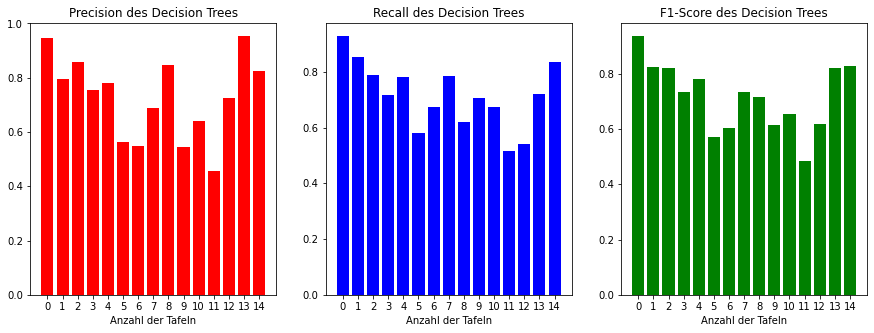

In [164]:
feature_path = './Image_Proc/data_with_features_without_white.csv'
if platform.system() == "Windows":
    feature_path = feature_path.replace("/", "\\")
df = pd.read_csv(feature_path)

X = df[["Contours Colour", "Contours Size Colour", "Lines"]] # definiert die ersten 3 Spalten als Features
y = df["label"] # definiert die letzte Spalte als Kategorie (entspricht dem Ergebnis)
# trennt die Test- und Trainingsdaten / Übergeben werden die Feautues und die Kategorien / die Anzahl der Testdaten (30% zum Testen
# 70% zum Trainieren, random_state wenn auf None werden die Daten immer unterschiedlich zugeteilt, sonst immer die Gleichen)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=0, max_depth=9) # baut den Entscheidungsbaum mit maximaler Tiefe von 2
# Trainiert den Entscheidungsbaum mit den Trainingsdaten (bestehend aus Input und dem richtigen Ergebnis)
model.fit(X_train, y_train)

print(model.score(X_test, y_test)) # Gibt das Ergebnis des Trainings zurück / wie viele Inputs wurden auf das richtige Ergebnis gemappt
tree_predictions = model.predict(X_test)

tree_precisions = precision_score(y_test, tree_predictions, average=None)
tree_recalls = recall_score(y_test, tree_predictions, average=None)
tree_f1s = f1_score(y_test, tree_predictions, average=None)

tree_precisions_avg = precision_score(y_test, tree_predictions, average="macro")
tree_recalls_avg = recall_score(y_test, tree_predictions, average="macro")
tree_f1s_avg = f1_score(y_test, tree_predictions, average="macro")


print(f"Average Precision: {tree_precisions_avg}")
print(f"Average Recall: {tree_recalls_avg}")
print(f"Average F1-Score: {tree_f1s_avg}")

fig, ax = plt.subplots(1, 3, figsize=(15,5))
plt.setp(ax, xticks=np.unique(y_test), xlabel="Anzahl der Tafeln")

ax[0].bar(np.unique(y_test), tree_precisions, color='red')
ax[0].set_title("Precision des Decision Trees")
ax[1].bar(np.unique(y_test), tree_recalls, color='blue')
ax[1].set_title("Recall des Decision Trees")
ax[2].bar(np.unique(y_test), tree_f1s, color='green')
ax[2].set_title("F1-Score des Decision Trees")
plt.show()

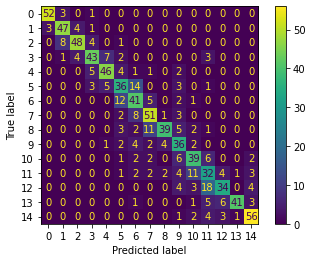

In [165]:
ConfusionMatrixDisplay.from_predictions(y_test, tree_predictions)

## CNN mit Keras

### Laden der Daten

In [166]:
cnn_image_path = "./data/256_res/*.png"
if platform.system() == "Windows":
    cnn_image_path = cnn_image_path.replace("/", "\\")
images_list = glob(cnn_image_path)
image_names = [os.path.basename(file) for file in glob(cnn_image_path)]
features = np.ndarray((len(images_list), 196, 196, 3))
for count, image in enumerate(images_list):
    im = cv2.imread(image)
    im = cv2.resize(im, (196, 196))
    colored_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    features[count,:,:] = colored_image

features = features[:,:,:]
cnn_label_path = "./Labeling_App/Labels.csv"
if platform.system() == "Windows":
    cnn_label_path = cnn_label_path.replace("/", "\\")
df_labels = pd.read_csv(cnn_label_path)
df_labels = pd.get_dummies(df_labels, columns=["label"])

labels = np.ndarray((df_labels.shape[0], df_labels.shape[1]-1))
for im_count, image in enumerate(image_names):
    labels[im_count, :] = df_labels[df_labels["file"] == image].iloc[:, 1:].values
        
[X_train, X_test, y_train, y_test] = train_test_split(features, labels, test_size=0.2, random_state=41)
[X_train, X_val, y_train, y_val] = train_test_split(X_train, y_train, test_size=0.3, random_state=41)

## Laden eines bereits vorhandenen Modells

In [6]:
cnn_model_path = "./models/CNN_71.h5"
if platform.system() == "Windows":
    cnn_model_path = cnn_model_path.replace("/", "\\")
    
loaded_model = tf.keras.models.load_model(cnn_model_path)

In [8]:
# Testen des geladenen Modells

loaded_model.evaluate(X_test, y_test)
predictions = loaded_model.predict(X_test)

19/19 [==============================] - 2s 97ms/step


Ausgabe der einzelnen klassifizierten Wahrscheinlichkeiten

In [9]:
df_test = pd.DataFrame(predictions.round(3)*100)
df_test["Label"] = np.argmax(y_test, axis=1)
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Label
0,0.0,0.100000,0.700000,7.500000,7.100000,9.099999,13.9,39.599998,19.600000,0.7,1.200000,0.4,0.0,0.000000,0.000000,6
1,1.0,57.000000,37.299999,3.400000,0.900000,0.200000,0.1,0.000000,0.000000,0.1,0.000000,0.0,0.0,0.000000,0.100000,2
2,0.0,0.100000,7.200000,72.699997,15.600000,2.700000,0.3,1.200000,0.300000,0.0,0.000000,0.0,0.0,0.000000,0.000000,3
3,0.0,0.300000,8.500000,21.299999,48.899998,19.200001,1.5,0.300000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,4
4,0.1,75.599998,24.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.1,0.200000,0.1,2.3,96.300003,1.100000,13
596,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,31.500000,64.099998,0.1,1.900000,1.9,0.3,0.000000,0.000000,8
597,0.0,0.000000,0.000000,0.200000,0.300000,0.400000,0.9,62.699997,35.400002,0.0,0.100000,0.1,0.0,0.000000,0.000000,7
598,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.3,14.5,5.900000,79.299995,14


### Plotten der Konfusionsmatrix

In [10]:
y_test_classes = np.argmax(y_test, axis=1)
predictions_classes = np.argmax(predictions, axis=1)

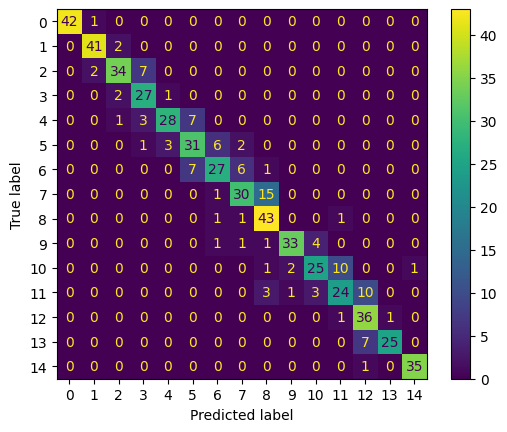

In [12]:
result = confusion_matrix(y_test_classes, predictions_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=np.unique(y_test_classes))
disp.plot()

### Plotten des Classification reports

In [13]:
print(classification_report(y_test_classes, predictions_classes))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      0.95      0.94        43
           2       0.87      0.79      0.83        43
           3       0.71      0.90      0.79        30
           4       0.88      0.72      0.79        39
           5       0.69      0.72      0.70        43
           6       0.75      0.66      0.70        41
           7       0.75      0.65      0.70        46
           8       0.67      0.93      0.78        46
           9       0.92      0.82      0.87        40
          10       0.78      0.64      0.70        39
          11       0.67      0.59      0.62        41
          12       0.67      0.95      0.78        38
          13       0.96      0.78      0.86        32
          14       0.97      0.97      0.97        36

    accuracy                           0.80       600
   macro avg       0.81      0.80      0.80       600
weighted avg       0.81   

### Plotten des Fehlers auf den Trainings- und Validierungsdaten

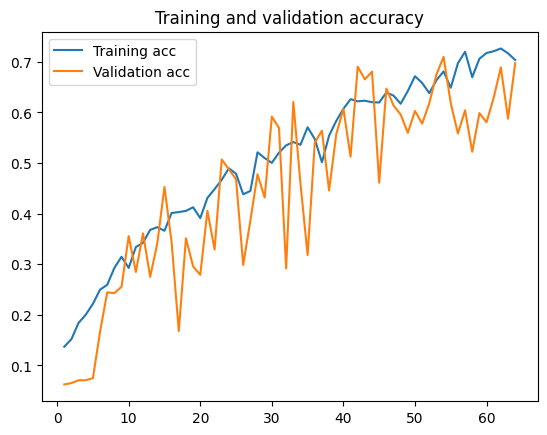

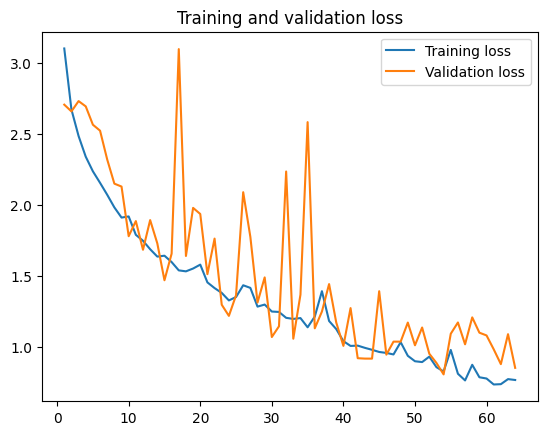